### DATA620 - Week 6 Assignment

### Chunjie Nan

### Project tasks

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:


1.Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.

2.Dataset.
Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

3.What can you infer about the relationships between (1) the women, and (2) the social events?  

### Data set description

DAVIS SOUTHERN CLUB WOMEN

DATASET DAVIS

DESCRIPTION One 18×14 matrix, binary.

BACKGROUND These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

REFERENCES

Breiger R. (1974). The duality of persons and groups. Social Forces, 53, 181-190.
Davis, A et al. (1941). Deep South. Chicago: University of Chicago Press.


### Import  data

In [61]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import numpy as np
import matplotlib.pyplot as plt


In [9]:
g = nx.davis_southern_women_graph()
women = g.graph['top']
clubs = g.graph['bottom']

In [11]:
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [14]:
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

### Biadjacency matrix

In [19]:
print(bipartite.biadjacency_matrix(g, women, clubs))

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


### Women degrees and weights

In [27]:
W = bipartite.projected_graph(g, women)
print('# of friends, member')

w_d = {}
for w in women:
    w_d[w] = W.degree(w)
    
for w in sorted(w_d, key = w_d.get, reverse = True):
    print(w_d[w],w)

# of friends, member
17 Evelyn Jefferson
17 Theresa Anderson
17 Ruth DeSand
17 Verne Sanderson
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Pearl Oglethorpe
16 Myra Liddel
16 Katherina Rogers
16 Dorothy Murchison
15 Laura Mandeville
15 Brenda Rogers
15 Frances Anderson
15 Eleanor Nye
12 Olivia Carleton
12 Flora Price
11 Charlotte McDowd


In [32]:
W = bipartite.weighted_projected_graph(g, women)
print('# of friends, member')


w_w = {}
for w in women:
    w_w[w] = W.degree(w, weight='weight')
    
for w in sorted(w_w, key = w_w.get, reverse = True):
    print(w_w[w], w)

# of friends, member
57 Theresa Anderson
50 Evelyn Jefferson
46 Brenda Rogers
46 Sylvia Avondale
45 Laura Mandeville
43 Nora Fayette
40 Ruth DeSand
38 Verne Sanderson
37 Katherina Rogers
36 Eleanor Nye
34 Helen Lloyd
33 Myra Liddel
32 Frances Anderson
31 Pearl Oglethorpe
24 Charlotte McDowd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


The results from degrees and weights seems very different.Due to the number of friends are the same, it means the strength of connection are very similar. 


### Network graph for women

In [68]:
weights = [edata['weight'] for f, t, edata in W.edges(data=True)]
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,8)

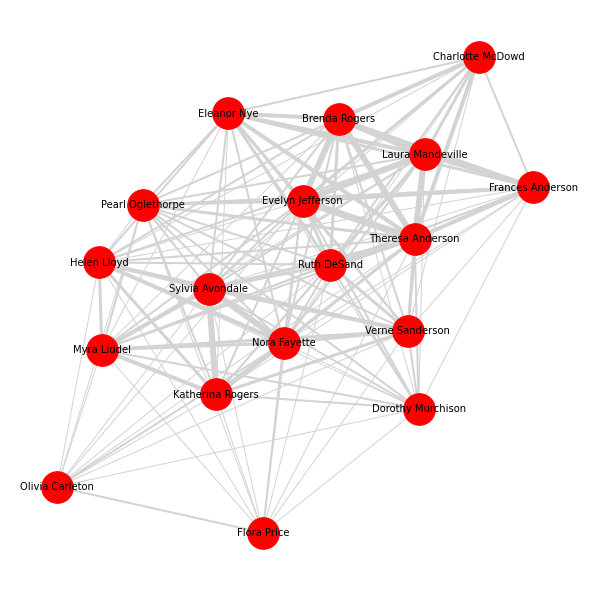

In [69]:
nx.draw(W, width = weights, with_labels = True, edge_color = 'lightgray', font_size = 10, node_color = 'red', node_size = 1000)

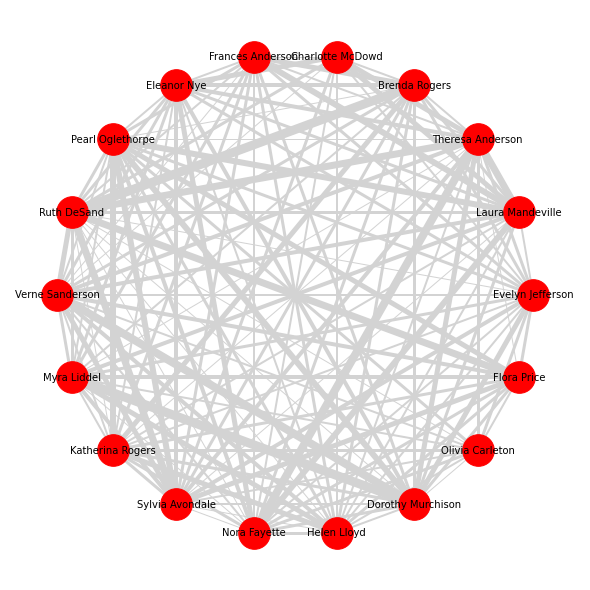

In [86]:
nx.draw_circular(W,width = weights, with_labels = True, edge_color = 'lightgray', font_size = 10, node_color = 'red', node_size = 1000)

According to the circular graph, the influencers are Brenda, Theresa, Laura, Evelyn, Sylvia, and Katherina.

### Club degrees and weights

In [80]:
C = bipartite.projected_graph(g, clubs)
print('# attendance, clubs')

c_d = {}
for c in clubs:
    c_d[c] = C.degree(c)
    
for c in sorted(c_d, key = c_d.get, reverse = True):
    print(c_d[c],c)

# attendance, clubs
13 E6
13 E7
13 E8
13 E9
8 E1
8 E2
8 E3
8 E4
8 E5
8 E10
8 E11
8 E12
8 E13
8 E14


Among the clubs, E6,E7,E8,and E9 have the most attendance in terms of degrees.

In [82]:
C = bipartite.weighted_projected_graph(g, clubs)
print('# friends, clubs')

W = bipartite.weighted_projected_graph(g, women)
print('# attendance, member')


c_w = {}
for c in clubs:
    c_w[c] = C.degree(c, weight='weight')
    
for c in sorted(c_w, key = c_w.get, reverse = True):
    print(c_w[c], c)

# friends, clubs
# attendance, member
59 E8
48 E7
46 E9
41 E6
38 E5
32 E3
28 E12
25 E10
23 E4
20 E2
19 E1
18 E13
18 E14
13 E11


The attendance for E8 is overwhelming other clubs, and E7,E6,E9 follow in terms of weights. 

### Network graph for clubs

In [84]:
weights = [edata['weight'] for f, t, edata in C.edges(data=True)]

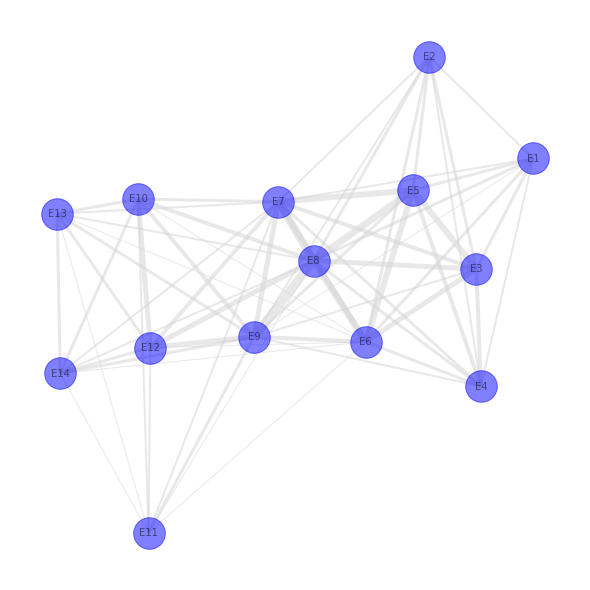

In [89]:
nx.draw(C, width = weights, with_labels = True, edge_color = 'lightgray', font_size = 10, node_color = 'blue', node_size = 1000, alpha = 0.5)

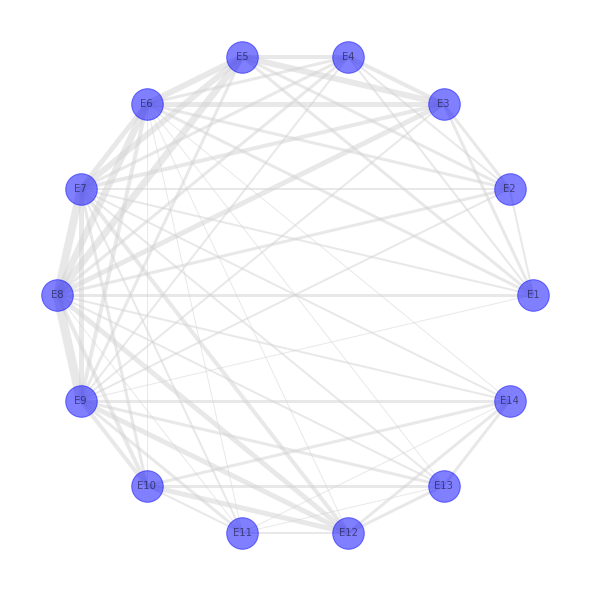

In [92]:
nx.draw_circular(C,width = weights, with_labels = True, edge_color = 'lightgray', font_size = 10, node_color = 'blue', node_size = 1000, alpha = 0.5)

The graph confirms that E6, E7, E8, E9 clubs have the most attendance.

### Bimodal Graph

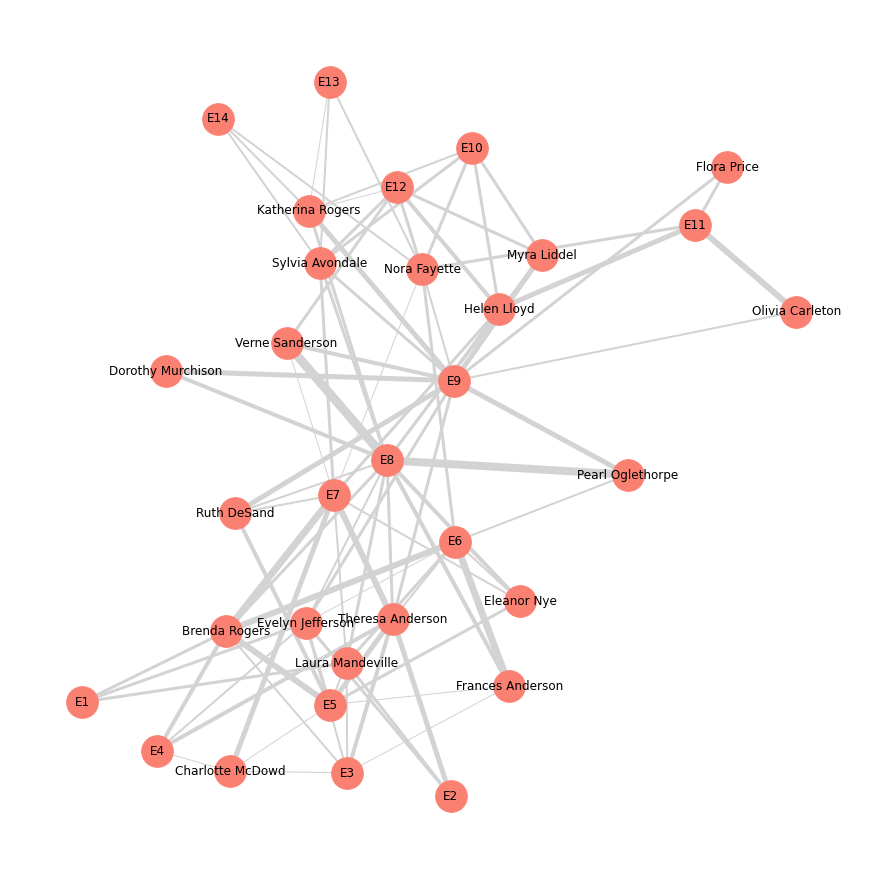

In [101]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)        
nx.draw(g, with_labels = True, node_size = 1000, width = weights, edge_color = 'lightgray', node_color = 'salmon')

In summary,  the active influencers are Brenda, Theresa, Laura, Evelyn, Sylvia, Katherina.
Olivi, Flora are the least are far away from the clubs
The club  E6,E7,E8, E9 have the most attendance which are the most popular clubs, and E1, E11, E13, E14 are the least popular clubs.
The bimodal graph shows the connections between clubs and members, but hardly to see the relationships clearly  between the members and clubs. However I can tell that the active influencers attends either one or more the most popular clubs. 